In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
import requests
import gmaps
import json

# Import API key
from api_keys import g_key

## Load the csv files from Data_Exploration_CleanUp

In [2]:
# G8 countries data
g8_countries_csv = "Data/output_g8_countries_cost_of_living.csv"
g8_countries = pd.read_csv(g8_countries_csv)
g8_countries

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Lat,Lng
0,Canada,70.22,34.33,53.40,70.01,67.86,87.98,56.130366,-106.346771
1,France,74.13,25.33,51.26,73.64,71.84,85.41,46.227638,2.213749
2,Germany,65.58,27.62,47.78,52.31,60.91,103.08,51.165691,10.451526
3,Italy,66.47,20.55,44.95,57.95,70.58,61.74,41.871940,12.567380
4,Japan,77.03,25.86,53.04,81.31,45.40,87.11,36.204824,138.252924
5,Russia,35.26,13.09,24.87,29.86,34.56,37.41,61.524010,105.318756
6,United Kingdom,69.65,31.84,51.93,56.58,76.79,88.78,55.378051,-3.435973
7,United States,70.13,42.07,56.98,70.37,70.07,106.34,37.090240,-95.712891


In [3]:
# G8 cities data
g8_cities_csv = "Data/output_g8_cities_cost_of_living.csv"
g8_cities = pd.read_csv(g8_cities_csv)
g8_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,Lat,Lng
0,Honolulu,103.65,65.07,85.56,114.92,94.28,89.24,United States,21.309884,-157.858140
1,New York,100.00,100.00,100.00,100.00,100.00,100.00,United States,40.712775,-74.005973
2,Santa Barbara,95.01,78.42,87.23,99.53,99.41,93.86,United States,34.420831,-119.698190
3,Berkeley,94.36,88.22,91.48,106.23,78.85,85.78,United States,37.871523,-122.273042
4,San Francisco,93.91,108.42,100.72,97.05,93.40,133.16,United States,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...
214,Nizhny Novgorod,33.89,9.92,22.65,27.35,35.03,34.95,Russia,56.326868,44.005879
215,Yekaterinburg,33.23,10.91,22.77,29.47,27.76,57.77,Russia,56.843099,60.645409
216,Krasnodar,32.65,9.79,21.94,28.05,33.82,36.59,Russia,45.036035,38.974571
217,Novosibirsk,32.26,9.98,21.81,28.73,31.27,38.35,Russia,54.983269,82.896383


In [4]:
# UK cities data
uk_cities_csv = "Data/output_uk_cities_cost_of_living.csv"
uk_cities = pd.read_csv(uk_cities_csv)
uk_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,Lat,Lng
0,London,85.62,76.51,81.35,64.08,89.41,88.79,United Kingdom,51.507218,-0.127586
1,Brighton,79.57,51.44,66.39,63.41,86.88,74.78,United Kingdom,50.822940,-0.136267
2,Guildford,76.02,49.12,63.41,66.52,74.95,78.75,United Kingdom,51.236220,-0.570409
3,Oxford,75.68,49.17,63.25,65.90,75.45,104.03,United Kingdom,51.752021,-1.257726
4,Lincoln,75.60,22.24,50.59,60.86,90.13,88.99,United Kingdom,53.229456,-0.542683
5,York,75.52,34.08,56.10,62.37,80.71,73.46,United Kingdom,53.961421,-1.073911
6,Reading,75.27,41.70,59.53,63.44,85.76,100.89,United Kingdom,51.455120,-0.978747
7,Edinburgh,73.15,37.38,56.38,59.68,84.71,88.03,United Kingdom,55.953252,-3.188267
8,Milton Keynes,73.14,37.65,56.50,60.60,73.63,73.92,United Kingdom,52.040622,-0.759417
9,Manchester,73.14,34.94,55.23,60.14,87.50,91.33,United Kingdom,53.480759,-2.242631


## Bar Charts

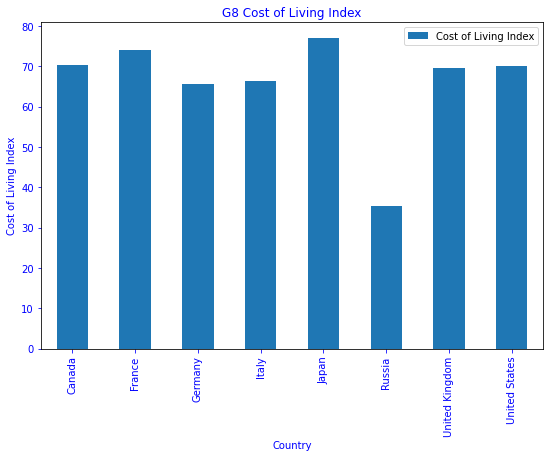

In [30]:
# Generate a bar plot showing the Cost of Living Index for the G8 Countries
plot = g8_countries.plot.bar(figsize=(9,6), x="Country", y="Cost of Living Index")  

# Set the xlabel and ylabel using class methods
plt.title("G8 Cost of Living Index",color="blue")
plt.xlabel("Country",color="blue")
plt.ylabel("Cost of Living Index",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.savefig("Images/G8 Cost of Living Index",dpi=250)
plt.show()

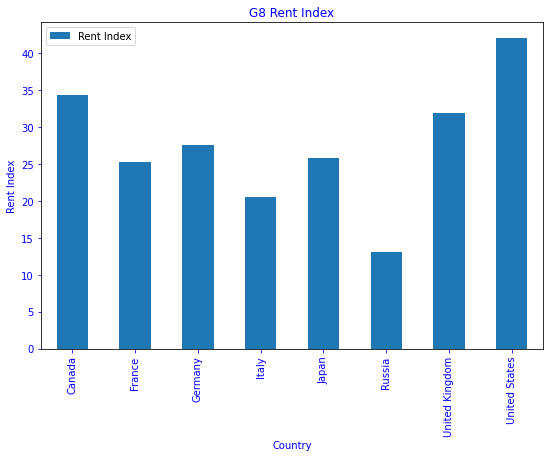

In [31]:
# Generate a bar plot showing the Rent Index for the G8 Countries
plot = g8_countries.plot.bar(figsize=(9,6), x="Country", y="Rent Index")  

# Set the xlabel and ylabel using class methods
plt.title("G8 Rent Index",color="blue")
plt.xlabel("Country",color="blue")
plt.ylabel("Rent Index",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.savefig("Images/Bar_G8 Rent Index",dpi=250)
plt.show()

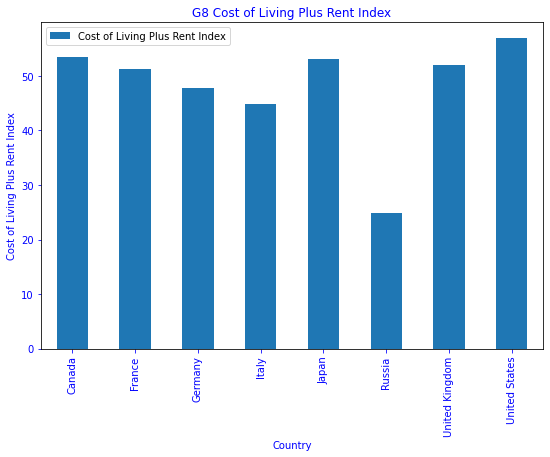

In [32]:
# Generate a bar plot showing the Cost of Living Plus Rent Index for the G8 Countries
plot = g8_countries.plot.bar(figsize=(9,6), x="Country", y="Cost of Living Plus Rent Index")  

# Set the xlabel and ylabel using class methods
plt.title("G8 Cost of Living Plus Rent Index",color="blue")
plt.xlabel("Country",color="blue")
plt.ylabel("Cost of Living Plus Rent Index",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.savefig("Images/Bar_G8 Cost of Living Plus Rent Index",dpi=250)
plt.show()

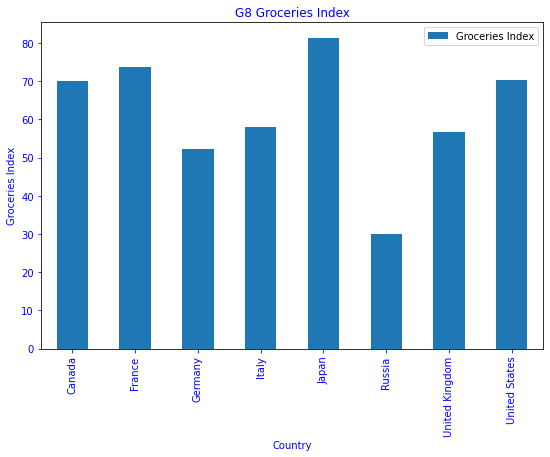

In [33]:
# Generate a bar plot showing the Groceries Index for the G8 Countries
plot = g8_countries.plot.bar(figsize=(9,6), x="Country", y="Groceries Index")  

# Set the xlabel and ylabel using class methods
plt.title("G8 Groceries Index",color="blue")
plt.xlabel("Country",color="blue")
plt.ylabel("Groceries Index",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.savefig("Images/Bar_G8 Groceries Index",dpi=250)
plt.show()

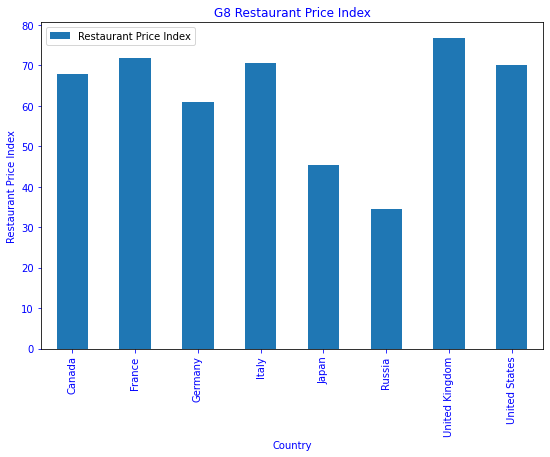

In [34]:
# Generate a bar plot showing the Restaurant Price Index for the G8 Countries
plot = g8_countries.plot.bar(figsize=(9,6), x="Country", y="Restaurant Price Index")  

# Set the xlabel and ylabel using class methods
plt.title("G8 Restaurant Price Index",color="blue")
plt.xlabel("Country",color="blue")
plt.ylabel("Restaurant Price Index",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.savefig("Images/Bar_G8 Restaurant Price Index",dpi=250)
plt.show() 

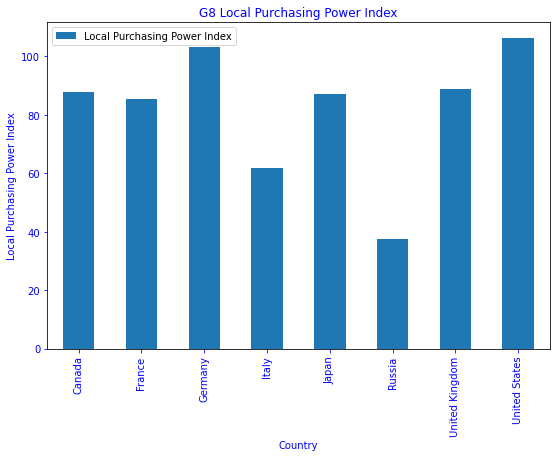

In [35]:
# Generate a bar plot showing the Local Purchasing Power Index for the G8 Countries
plot = g8_countries.plot.bar(figsize=(9,6), x="Country", y="Local Purchasing Power Index")  

# Set the xlabel and ylabel using class methods
plt.title("G8 Local Purchasing Power Index",color="blue")
plt.xlabel("Country",color="blue")
plt.ylabel("Local Purchasing Power Index",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.savefig("Images/Bar_G8 Local Purchasing Power Index",dpi=250)
plt.show()

## Pie Charts

In [11]:
countries = g8_countries["Country"]
cost_of_living = g8_countries["Cost of Living Index"]
colors = ["yellow", "green", "lightblue", "orange", "pink", "purple", "red", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0, 0.1, 0)

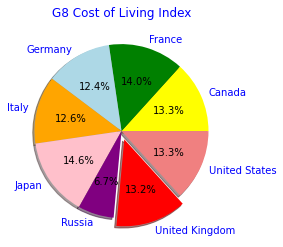

In [12]:
patches, texts, pcts = plt.pie(cost_of_living, explode = explode, labels=countries, colors=colors, shadow=True, autopct="%1.1f%%")
plt.axis="equal"
plt.title("G8 Cost of Living Index",color="blue")
plt.setp(texts, color="blue")
plt.savefig("Images/Pie_G8 Cost of Living Index",dpi=250)
plt.show()

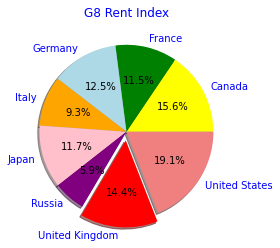

In [13]:
rent_index = g8_countries["Rent Index"]
patches, texts, pcts = plt.pie(rent_index, explode = explode, labels=countries, colors=colors, shadow=True, autopct="%1.1f%%")
plt.axis="equal"
plt.title("G8 Rent Index",color="blue")
plt.setp(texts, color="blue")
plt.savefig("Images/Pie_G8 Rent Index",dpi=250)
plt.show()

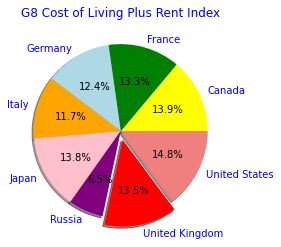

In [14]:
cost_of_living_plus_rent = g8_countries["Cost of Living Plus Rent Index"]
patches, texts, pcts = plt.pie(cost_of_living_plus_rent, explode = explode, labels=countries, colors=colors, shadow=True, autopct="%1.1f%%")
plt.axis="equal"
plt.title("G8 Cost of Living Plus Rent Index",color="blue")
plt.setp(texts, color="blue")
plt.savefig("Images/Pie_G8 Cost of Living Plus Rent Index",dpi=250)
plt.show()

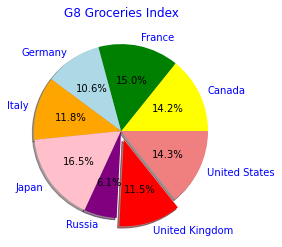

In [15]:
groceries_index = g8_countries["Groceries Index"]
patches, texts, pcts = plt.pie(groceries_index, explode = explode, labels=countries, colors=colors, shadow=True, autopct="%1.1f%%")
plt.axis="equal"
plt.title("G8 Groceries Index",color="blue")
plt.setp(texts, color="blue")
plt.savefig("Images/Pie_G8 Groceries Index",dpi=250)
plt.show()

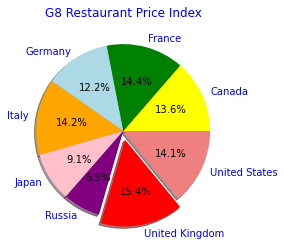

In [16]:
restaurant_price_index = g8_countries["Restaurant Price Index"]
patches, texts, pcts = plt.pie(restaurant_price_index, explode = explode, labels=countries, colors=colors, shadow=True, autopct="%1.1f%%")
plt.axis="equal"
plt.title("G8 Restaurant Price Index",color="blue")
plt.setp(texts, color="blue")
plt.savefig("Images/Pie_G8 Restaurant Price Index",dpi=250)
plt.show()

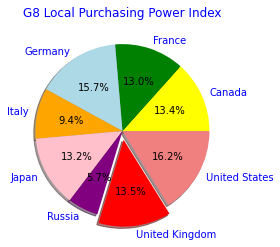

In [17]:
lpp_index = g8_countries["Local Purchasing Power Index"]
patches, texts, pcts = plt.pie(lpp_index, explode = explode, labels=countries, colors=colors, shadow=True, autopct="%1.1f%%")
plt.axis="equal"
plt.title("G8 Local Purchasing Power Index",color="blue")
plt.setp(texts, color="blue")
plt.savefig("Images/Pie_G8 Local Purchasing Power Index",dpi=250)
plt.show()

## Scatter Plots

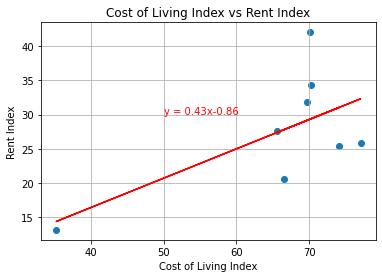

In [18]:
# cost of Living vs Rent
slope, intercept, rvalue, pvalue, stderr = stats.linregress(g8_countries['Cost of Living Index'],g8_countries["Rent Index"])
y = g8_countries['Cost of Living Index']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x" + str(round(intercept,2))
plt.scatter(g8_countries['Cost of Living Index'],g8_countries["Rent Index"])
plt.plot(g8_countries['Cost of Living Index'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(50,30),color='red')
plt.title("Cost of Living Index vs Rent Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Rent Index")
plt.savefig("Images/Scatter_G8 Cost of Living Index vs Rent Index",dpi=250)
plt.show()

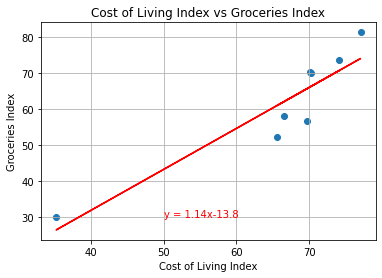

In [19]:
# cost of Living vs Groceries Index
slope, intercept, rvalue, pvalue, stderr = stats.linregress(g8_countries['Cost of Living Index'],g8_countries["Groceries Index"])
y = g8_countries['Cost of Living Index']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x" + str(round(intercept,2))
plt.scatter(g8_countries['Cost of Living Index'],g8_countries["Groceries Index"])
plt.plot(g8_countries['Cost of Living Index'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(50,30),color='red')
plt.title("Cost of Living Index vs Groceries Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Groceries Index")
plt.savefig("Images/Scatter_G8 Cost of Living Index vs Groceries Index",dpi=250)
plt.show()

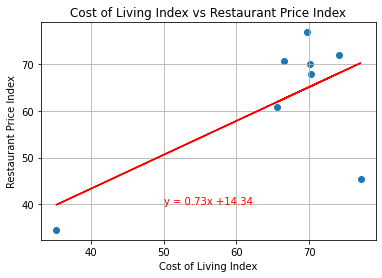

In [20]:
# cost of Living vs Resturant price
slope, intercept, rvalue, pvalue, stderr = stats.linregress(g8_countries['Cost of Living Index'],g8_countries["Restaurant Price Index"])
y = g8_countries['Cost of Living Index']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(g8_countries['Cost of Living Index'],g8_countries["Restaurant Price Index"])
plt.plot(g8_countries['Cost of Living Index'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(50,40),color='red')
plt.title("Cost of Living Index vs Restaurant Price Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Restaurant Price Index")
plt.savefig("Images/Scatter_G8 Cost of Living Index vs Restaurant Price Index",dpi=250)
plt.show()

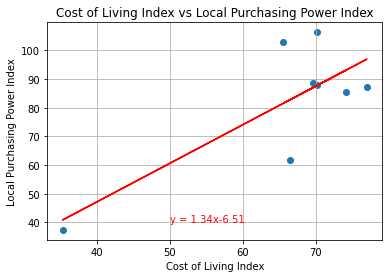

In [21]:
# cost of Living vs Local Purchasing Power Index
slope, intercept, rvalue, pvalue, stderr = stats.linregress(g8_countries['Cost of Living Index'],g8_countries["Local Purchasing Power Index"])
y = g8_countries['Cost of Living Index']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x" + str(round(intercept,2))
plt.scatter(g8_countries['Cost of Living Index'],g8_countries["Local Purchasing Power Index"])
plt.plot(g8_countries['Cost of Living Index'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(50,40),color='red')
plt.title("Cost of Living Index vs Local Purchasing Power Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Local Purchasing Power Index")
plt.savefig("Images/Scatter_G8 Cost of Living Index vs Local Purchasing Power Index",dpi=250)
plt.show()

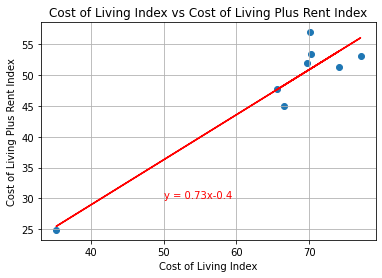

In [22]:
# cost of Living vs Cost of Living Plus Rent Index
slope, intercept, rvalue, pvalue, stderr = stats.linregress(g8_countries['Cost of Living Index'],g8_countries["Cost of Living Plus Rent Index"])
y = g8_countries['Cost of Living Index']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x" + str(round(intercept,2))
plt.scatter(g8_countries['Cost of Living Index'],g8_countries["Cost of Living Plus Rent Index"])
plt.plot(g8_countries['Cost of Living Index'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(50,30),color='red')
plt.title("Cost of Living Index vs Cost of Living Plus Rent Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Cost of Living Plus Rent Index")
plt.savefig("Images/Scatter_G8 Cost of Living Index vs Cost of Living Plus Rent Index",dpi=250)
plt.show()

## Cost of Living Heatmap

In [23]:
# Load the csv file containing all the cost of living index for all countries including Latitude and Logitude details

all_countries_csv = "Data/output_all_countries_lat_lng.csv"
all_countries = pd.read_csv(all_countries_csv)
all_countries

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Lat,Lng
0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04,33.939110,67.709953
1,Albania,35.50,8.47,22.83,29.32,25.82,30.19,41.153332,20.168331
2,Algeria,26.87,4.59,16.43,28.82,14.48,24.63,28.033886,1.659626
3,Argentina,34.69,7.71,22.04,28.17,33.32,30.72,-38.416097,-63.616672
4,Armenia,33.89,11.61,23.45,27.59,30.55,28.86,40.069099,45.038189
...,...,...,...,...,...,...,...,...,...
134,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41,6.423750,-66.589730
135,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38,14.058324,108.277199
136,Yemen,53.14,6.71,31.38,67.12,24.74,14.41,15.552727,48.516388
137,Zambia,33.04,9.26,21.90,31.53,22.46,40.33,-13.133897,27.849332


In [24]:
# Configure gmaps with API key
gmaps.configure(api_key = g_key)

In [25]:
# Store 'Lat' and 'Lng' into  locations 
locations = all_countries[["Lat", "Lng"]].astype(float)

# Store 'Cost of Living Index' into weights
weights = all_countries["Cost of Living Index"].astype(float)

In [26]:
# Create a humidity Heatmap layer
fig = gmaps.figure(center = [0,0] ,zoom_level = 2)

heat_layer = gmaps.heatmap_layer(locations, weights=weights, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 2)

fig.add_layer(heat_layer)

# Display map
fig

Figure(layout=FigureLayout(height='420px'))